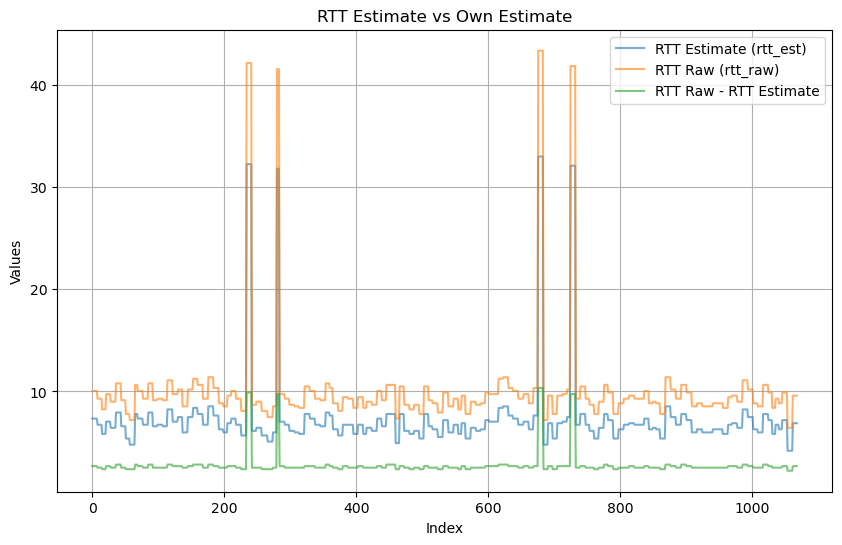

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Caminho do arquivo CSV
csv_file = 'Outdoor20/10.csv'
nano2m = 0.299792458

# Lê o arquivo CSV
data = pd.read_csv(csv_file)
anchorId = '7c:df:a1:0e:db:f1'
# data = data[data['anchorId'] == anchorId]

# Verifica se as colunas existem no arquivo

# Plota os dados como pontos
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['rtt_est'] * nano2m / 2,  label='RTT Estimate (rtt_est)', alpha=0.6)
#plt.plot(data.index, data['own_est'], label='Own Estimate (own_est)', alpha=0.6)
plt.plot(data.index, data['rtt_raw'] * nano2m / 2,  label='RTT Raw (rtt_raw)', alpha=0.6)
#plt.plot(data.index, (data['rtt_raw'] - data['rtt_est']),  label='Diferença', alpha=0.6)
difference = (data['rtt_raw'] - data['rtt_est']) * nano2m / 2
plt.plot(data.index, difference, label='RTT Raw - RTT Estimate', alpha=0.6)


# Adiciona título e legendas
plt.title('RTT Estimate vs Own Estimate')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid()

# Exibe o gráfico
plt.show()

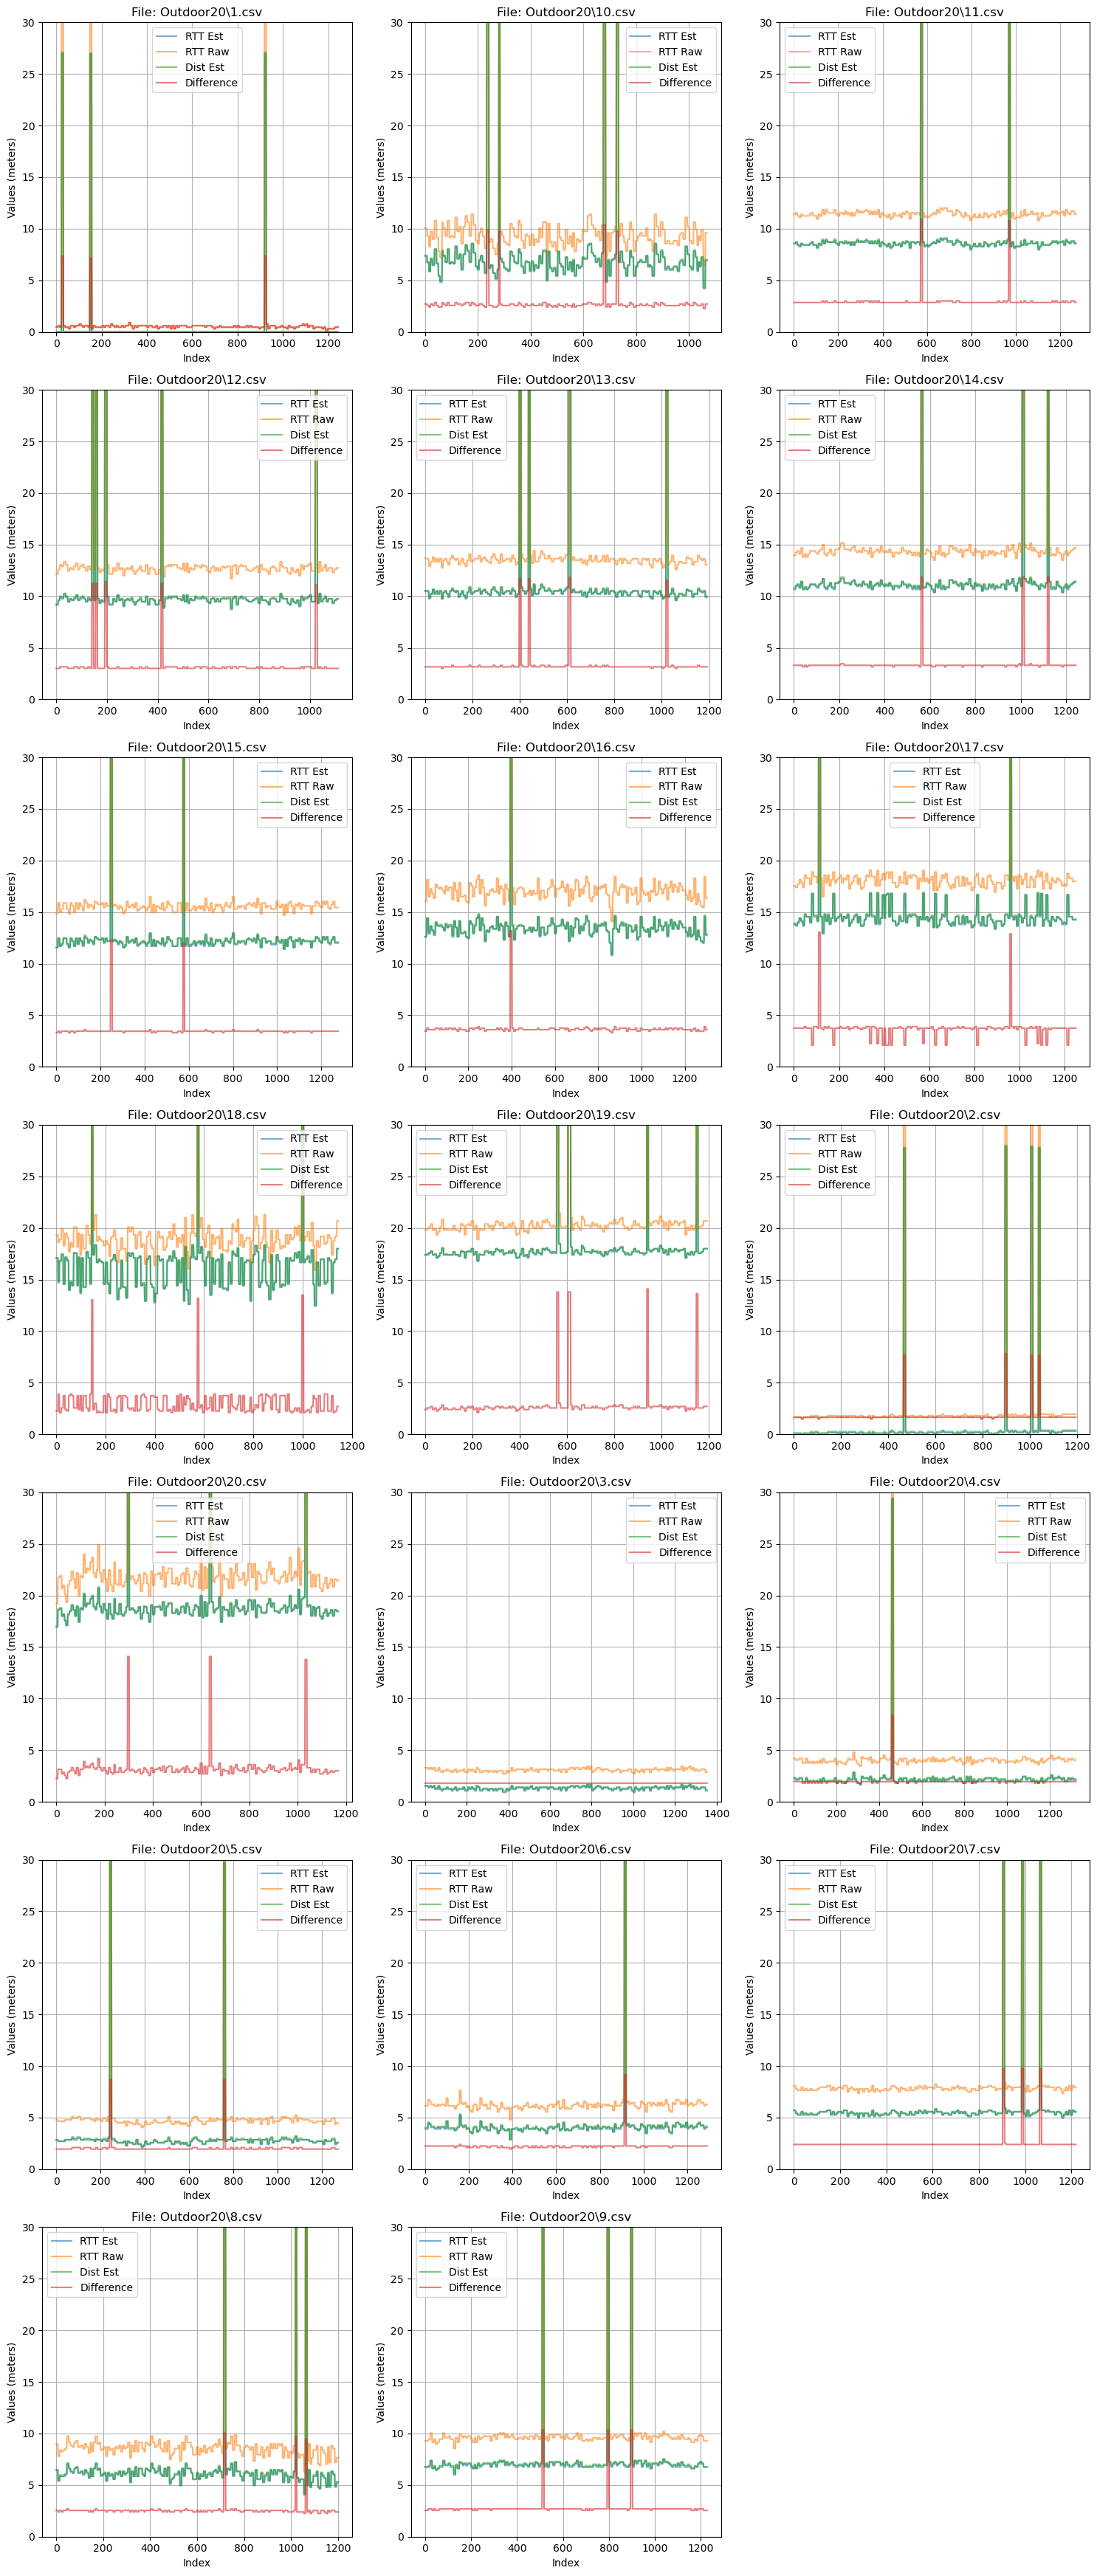

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import math

# Find all CSV files in directory
csv_files = glob.glob('Outdoor20/*.csv')
nano2m = 0.299792458

# Calculate subplot grid dimensions
n_files = len(csv_files)
n_cols = 3  # Number of columns in grid
n_rows = math.ceil(n_files / n_cols)

# Create figure with subplots
fig = plt.figure(figsize=(15, 5*n_rows))
plt.subplots_adjust(hspace=0.4)

# Process each CSV file
for idx, csv_file in enumerate(csv_files, 1):
    # Read data
    data = pd.read_csv(csv_file)
    
    # Create subplot
    ax = fig.add_subplot(n_rows, n_cols, idx)
    
    # Plot data
    ax.plot(data.index, data['rtt_est'] * nano2m / 2, label='RTT Est', alpha=0.6)
    ax.plot(data.index, data['rtt_raw'] * nano2m / 2, label='RTT Raw', alpha=0.6)
    ax.plot(data.index, data['dist_est'], label='Dist Est', alpha=0.6)
    
    
    # Calculate and plot difference
    difference = (data['rtt_raw'] - data['rtt_est']) * nano2m / 2
    ax.plot(data.index, difference, label='Difference', alpha=0.6)
    
    # Set y-axis limit to 30m
    ax.set_ylim(0, 30)

    # Add labels and title
    ax.set_title(f'File: {csv_file.split("/")[-1]}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Values (meters)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

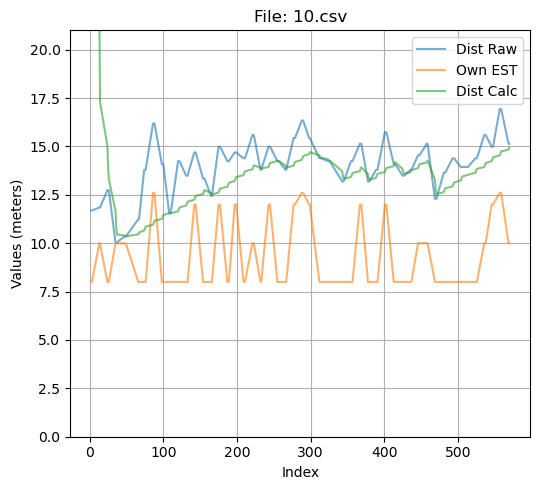

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import math

# Find all CSV files in directory
csv_files = glob.glob('ac/10.csv')
nano2m = 0.299792458

# Calculate subplot grid dimensions
n_files = len(csv_files)
n_cols = 3  # Number of columns in grid
n_rows = math.ceil(n_files / n_cols)

# Create figure with subplots
fig = plt.figure(figsize=(15, 5*n_rows))
plt.subplots_adjust(hspace=0.4)



# Process each CSV file
for idx, csv_file in enumerate(csv_files, 1):
    # Read data

    unique_ids = ['7c:df:a1:0e:db:f1', '7c:df:a1:06:b9:dd', '7c:df:a1:05:87:c7',
    '7c:df:a1:0f:74:e9']

    data = pd.read_csv(csv_file)
    anchorId = unique_ids[1] 

    data = data[data['anchorId'] == anchorId]
    data['dist_calc'] = 100.0
  
    valor = 100.0
    for index, row in data.iterrows():
        dist = row['rtt_raw'] * nano2m / 2
        if dist > valor:
            valor = valor + 0.1
        else:
            valor = valor - (valor - dist) * 0.5
        data.at[index, 'dist_calc'] = valor

    #print(data.describe())

    # Create subplot
    ax = fig.add_subplot(n_rows, n_cols, idx)
    
    # Plot data
    ax.plot(data.index, data['rtt_raw'] * nano2m / 2, label='Dist Raw', alpha=0.6)
    ax.plot(data.index, data['own_est'], label='Own EST', alpha=0.6)
    ax.plot(data.index, data['dist_calc'], label='Dist Calc', alpha=0.6)

        
    # Set y-axis limit to 30m
    ax.set_ylim(0, 21)

    # Add labels and title
    ax.set_title(f'File: {csv_file.split("/")[-1]}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Values (meters)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()